In [5]:
import numpy as np
# Generate data
n_features = 1
n_samples = 1000
X = np.random.normal(size=[n_samples, n_features])
y_regr = ( - 3 * X).reshape(-1)
z = 1 / (1 + np.exp(-y_regr))
y_clas = [np.random.choice(2, p = [1 - z[t], z[t]]) for t in range(n_samples)]


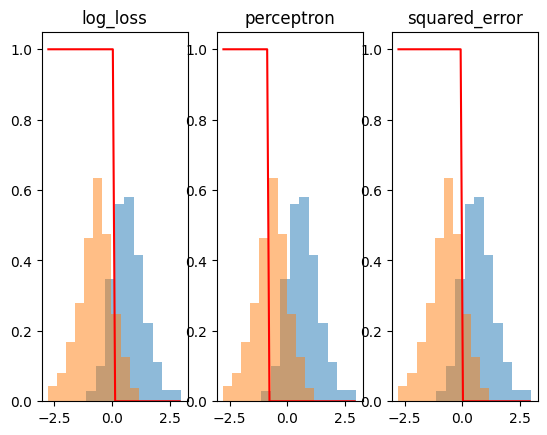

In [6]:
from sklearn.linear_model import SGDClassifier
xaxis = np.arange(min(X),max(X),0.1)
import matplotlib.pyplot as plt
k = 1
for loss in ['log_loss', 'perceptron', 'squared_error']:
    model = SGDClassifier(loss=loss)
    model.fit(X, y_clas)
    y = model.predict(xaxis.reshape(-1,1))
    plt.subplot(1, 3, k)
    plt.hist(X.reshape(-1)[np.array(y_clas)==0], alpha=0.5, density=True)
    plt.hist(X.reshape(-1)[np.array(y_clas)==1], alpha=0.5, density=True)
    plt.plot(xaxis, y, 'r')
    plt.title(loss)
    k+=1